In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [32]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]

df = pd.read_csv('/Users/xinyuzhao/Downloads/exp1.csv',
                names=names,index_col=False)


In [33]:
df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


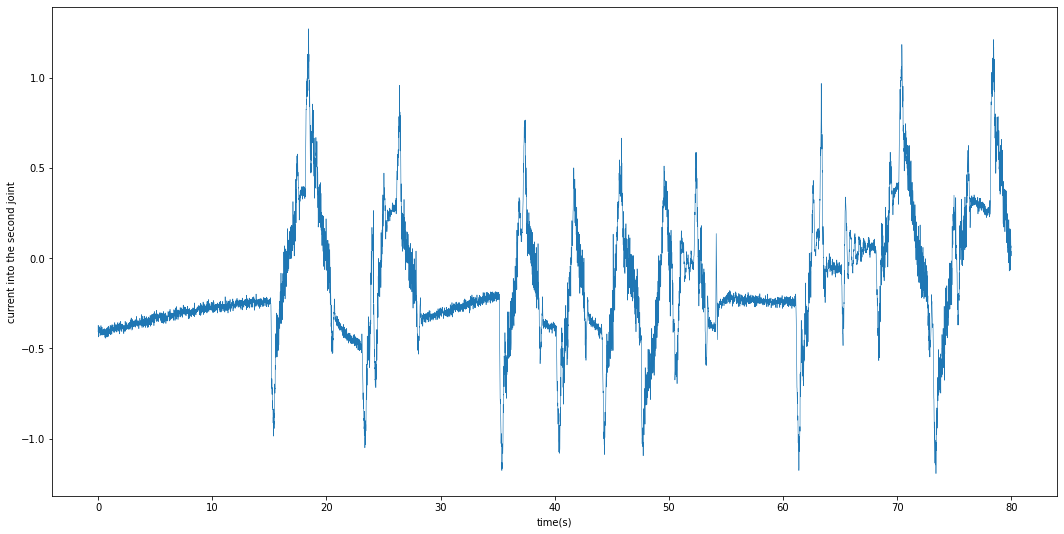

In [34]:
t = np.array(df['t'])
y = np.array(df['I2'])


plt.figure(figsize=(18,9))
plt.plot(t,y,linewidth=0.6)
plt.xlabel('time(s)')
plt.ylabel('current into the second joint')

plt.show()

In [35]:
xtrain=df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytrain = df['I2']

In [36]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [37]:
regr.fit(xtrain,ytrain)

LinearRegression()

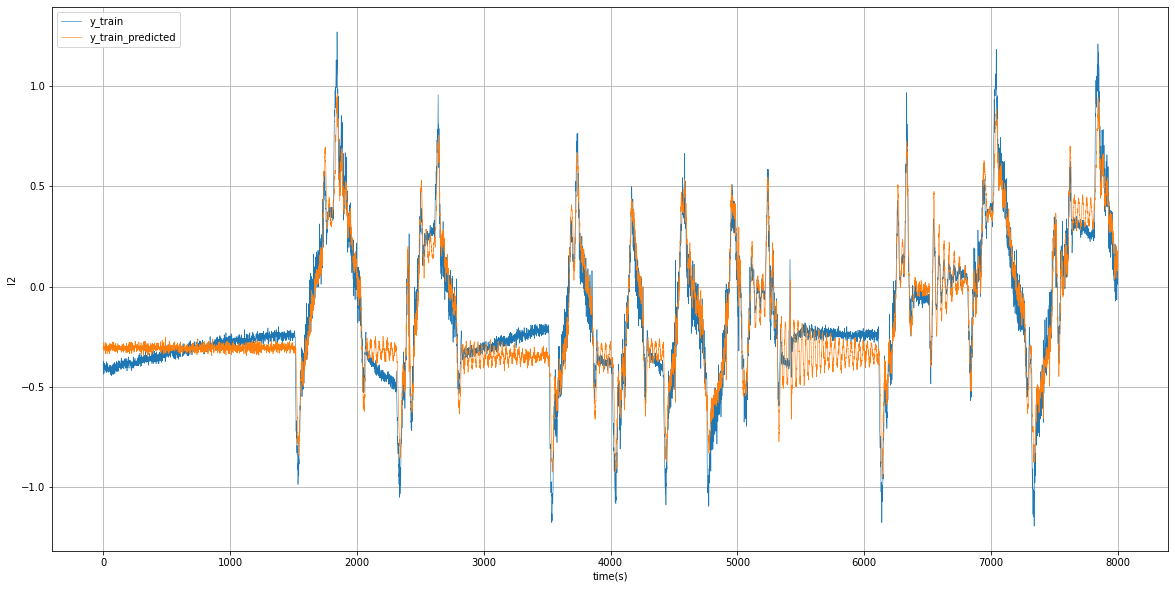

In [38]:
y_train_pred = regr.predict(xtrain)

plt.figure(figsize=(20,10))
plt.plot(df.index, ytrain,linewidth=0.6)
plt.plot(df.index, y_train_pred,linewidth=0.6)
plt.xlabel('time(s)')
plt.ylabel('I2')
plt.legend(['y_train', 'y_train_predicted'])
plt.grid()
plt.show()

In [39]:
RSS_train = np.mean((y_train_pred-ytrain)**2)/(np.std(ytrain)**2)
print("Normalized RSS (train) = {0:f}".format(RSS_train))

Normalized RSS (train) = 0.095833


In [44]:
df2 = pd.read_csv('/Users/xinyuzhao/Downloads/exp2.csv',
                names=names, index_col=False)

In [45]:
xtest= np.array(df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']])
ytest= np.array(df2['I2'])
y_test_pred = regr.predict(xtest)


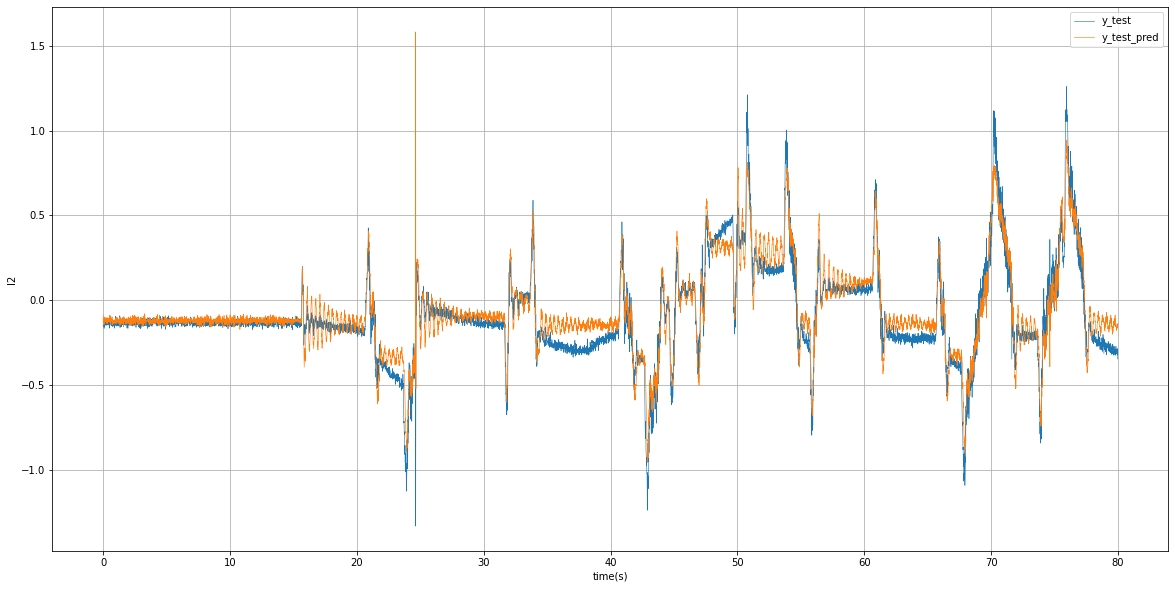

In [47]:
plt.figure(figsize=(20,10))
plt.plot(t, ytest,linewidth=0.6)
plt.plot(t, y_test_pred,linewidth=0.6)
plt.xlabel('time(s)')
plt.ylabel('I2')
plt.legend(['y_test', 'y_test_pred'])
plt.grid()
plt.show()

In [43]:
RSS_test = np.mean((y_test_pred-ytest)**2)/(np.std(ytest)**2)
print("Normalized RSS (test) = {0:f}".format(RSS_test))

Normalized RSS (test) = 0.126780
